In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dense,LSTM
from keras.models import Sequential

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

%matplotlib inline

In [223]:
dfm_series = pd.read_csv('mergeddataseries.csv')
dfm_series = dfm_series.drop(['Date', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)'], axis=1)
dfm_series.values

array([[  1.2138  ,   1.2171  ,   1.2105  , ..., 140.087128, 140.087128,
          1.2133  ],
       [  1.2148  ,   1.2158  ,   1.2084  , ..., 138.399063, 138.399063,
          1.2043  ],
       [  1.2051  ,   1.2111  ,   1.1993  , ..., 141.380417, 141.380417,
          1.201   ],
       ...,
       [  1.15186 ,   1.15989 ,   1.15175 , ..., 527.580017, 527.580017,
          1.15733 ],
       [  1.15861 ,   1.16101 ,   1.15339 , ..., 523.869995, 523.869995,
          1.15    ],
       [  1.15364 ,   1.16059 ,   1.15364 , ..., 525.169983, 525.169983,
          1.14522 ]])

In [224]:
#create train and test split
n_days = 5
n_features = 21
n_samples = len(dfm_series)
n_train_samples = int(n_samples * 0.8)
train = dfm_series.values[:n_train_samples, :]
test = dfm_series.values[n_train_samples:, :]
#split inputs and output
train_X, train_Y = train[:, :-1], train[:, -1]
test_X, test_Y = test[:, :-1], test[:,-1]
print(len(train))
print(len(test))
n_validate_sample=len(test)

train_X = train_X.reshape((len(train), n_days, n_features))
test_X = test_X.reshape((len(test), n_days, n_features))
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)



4983
1246
(4983, 5, 21) (4983,) (1246, 5, 21) (1246,)


Train on 4983 samples, validate on 1246 samples
Epoch 1/64
 - 3s - loss: 0.4462 - val_loss: 0.1694
Epoch 2/64
 - 1s - loss: 0.1322 - val_loss: 0.1215
Epoch 3/64
 - 1s - loss: 0.1382 - val_loss: 0.1190
Epoch 4/64
 - 1s - loss: 0.1465 - val_loss: 0.1172
Epoch 5/64
 - 1s - loss: 0.1342 - val_loss: 0.1211
Epoch 6/64
 - 1s - loss: 0.1415 - val_loss: 0.1173
Epoch 7/64
 - 1s - loss: 0.1420 - val_loss: 0.1201
Epoch 8/64
 - 1s - loss: 0.1242 - val_loss: 0.1209
Epoch 9/64
 - 1s - loss: 0.1315 - val_loss: 0.1172
Epoch 10/64
 - 1s - loss: 0.1252 - val_loss: 0.1209
Epoch 11/64
 - 1s - loss: 0.1254 - val_loss: 0.1147
Epoch 12/64
 - 1s - loss: 0.1373 - val_loss: 0.1208
Epoch 13/64
 - 1s - loss: 0.1273 - val_loss: 0.1171
Epoch 14/64
 - 1s - loss: 0.1201 - val_loss: 0.1205
Epoch 15/64
 - 1s - loss: 0.1170 - val_loss: 0.1174
Epoch 16/64
 - 1s - loss: 0.1226 - val_loss: 0.1101
Epoch 17/64
 - 1s - loss: 0.1109 - val_loss: 0.1209
Epoch 18/64
 - 1s - loss: 0.1066 - val_loss: 0.1180
Epoch 19/64
 - 1s - loss:

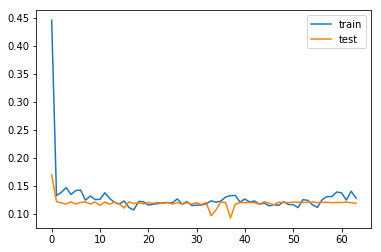

In [225]:
#define model
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_Y, epochs=64, batch_size=64, validation_data=(test_X, test_Y), verbose=2, shuffle=False)


# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()







In [226]:
#Validate with test set
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
inv_yhat = yhat
test_Y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y, test_X[:, -1:]), axis=1)

inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print(yhat)

Test RMSE: 0.129
[[1.2613963]
 [1.2613963]
 [1.2613963]
 ...
 [1.2613963]
 [1.2613963]
 [1.2613963]]


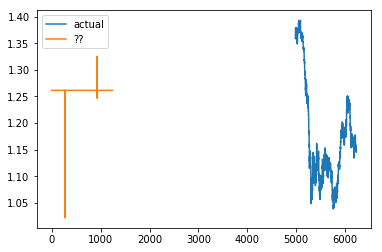

In [228]:

pyplot.plot(dfm_series['var2(t)'][n_train_samples:], label='actual')
#pyplot.plot(n_validate_samples, inv_y, label='prediction')
#pyplot.plot(inv_yhat, label='?')
pyplot.plot(yhat, label='??')
pyplot.legend()
pyplot.show()
